# Restaurant Finder

Uses the Google Maps api to find the (weighted) geometric centroid of friend locations.  

### Import statements

In [1]:
import googlemaps
import numpy as np
import requests
from IPython.display import Image

### Define addresses and weights

In [3]:
# cross streets
intersections = [
    '1st and union',
    '6th and stewart',
    '1st and king',
    '5th and Madison',
    '2nd and yesler',
]

# number of Insight colleagues at each intersection
weights = [2, 1, 1, 1, 1]

# modify intersection strings to include 'seattle, wa'
addresses = [x + ', seattle, wa' for x in intersections]   

# display addresses
addresses

['1st and union, seattle, wa',
 '6th and stewart, seattle, wa',
 '1st and king, seattle, wa',
 '5th and Madison, seattle, wa',
 '2nd and yesler, seattle, wa']

### Load Google API key

In [2]:
# change filename to match your key storage
keyfile = 'key.txt'

# read the key string, stripping out white space and returns
with open(keyfile, 'r') as f:
    key=f.read().replace('\n', '')
    
# establish api connection
gmaps = googlemaps.Client(key=key)

### Use the Google API to get the latitudes and longitudes

In [4]:
# make an api call for each address
latlons = []
for address in addresses:
    latlons.append(gmaps.geocode(address)[0]['geometry']['location'])

# display the lat/lon pairs
latlons

[{'lat': 47.6078204, 'lng': -122.3391182},
 {'lat': 47.6136209, 'lng': -122.337016},
 {'lat': 47.5980572, 'lng': -122.3345328},
 {'lat': 47.6063473, 'lng': -122.3319422},
 {'lat': 47.601433, 'lng': -122.3318717}]

### Calculate the (weighted) centroid

In [6]:
# calculate the weighted average of the lat/lon pairs
mean_lat = np.dot(weights, [x['lat'] for x in latlons])/sum(weights)
mean_lon = np.dot(weights, [x['lng'] for x in latlons])/sum(weights)

### Generate string to feed to Google Maps API

In [13]:
# url variable store url 
url = "https://maps.googleapis.com/maps/api/staticmap?"

# center defines the center of the map
center = "center=" + str(mean_lat) + ',' + str(mean_lon)

# zoom defines the zoom of the map
zoom = "&zoom=" + str(15)

# size defines how big the map is
size = "&size=1000x1000"

# the request needs the api key
api_key = "&key=" + key

# green pin at each office location
office_markers = '&markers=color:green%7Clabel:A'
for pos in latlons:
    ith_location = '%7C' + str(pos['lat']) + ',' + str(pos['lng'])
    office_markers += ith_location

# red pin at the centroid
restaurant_marker = '&markers=color:red%7Clabel:B%7C' + str(mean_lat) + ',' + str(mean_lon)

# assemble the request string
reqstr = url + center + zoom + office_markers + restaurant_marker + size + api_key

### Request the map

In [14]:
r = requests.get(reqstr) 

### Display the content

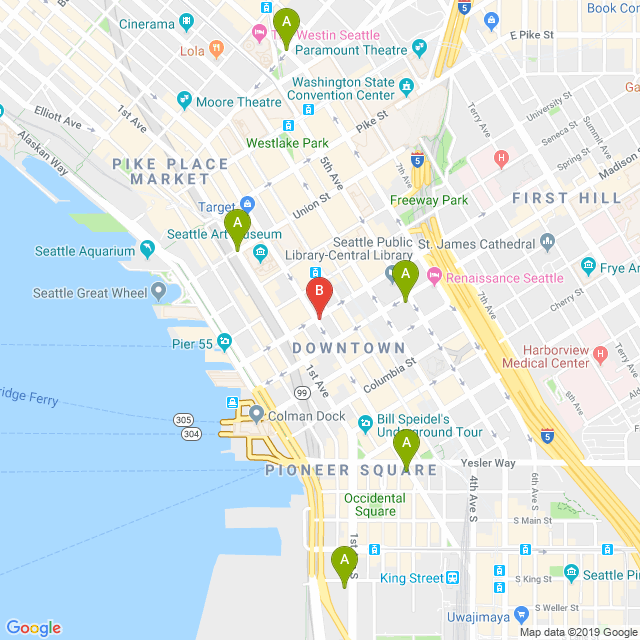

In [16]:
Image(r.content)